### NBA_Player_Analysis 
Author: Phong Le<br>
Date: 12/11/2018 

In this project, I will be analyzing National Basketball Association (NBA) player's statistics using the skills that I've learned from online classes and resources. Although this project has been performed by Tony Zhang
(https://www.kaggle.com/tonyzhang1997/nba-player-analysis) in RStudio, I found it interesting and and would like to improve my skills by using Python.
There are two files that I downloaded directly from Kaggle: ( https://www.kaggle.com/drgilermo/nba-players-stats/data)
The first file, Players.csv, contains all the NBA players information from 1950 to 2016. The second file,
Seasons_Stats.csv,
contains each player's in game statistics.<br>

I investigated the following problems:
1. What is the trend of NBA body types throughout the years?
2. What college program did players attend? Where do basketball player come from?
3. How did the game of basketball developed through out these years?

In [1]:
# Import Library

import pandas as pd
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
# Import plotly library to use choropleth map
import plotly.graph_objects as go
import random
# Import 'Players' file into a DataFrame called 'Players'. Set the leftmost column as the index and parse_dates=True
Players = pd.read_csv('/Users/phongleh/Desktop/Data Science/NBA Player Analysis Project/Players.csv', 
                      index_col=0, parse_dates=True)
# Print the first first rows of the dataset
Players.head()

,Player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


We can see that dataset player has 8 columns:<br>
  Index: index<br>
  Player: player's name<br>
  height: player's height<br>
  weight: player's weight<br>
  collage: player's college<br>
  born: date of birth<br>
  birth_state: state of birth<br>
All pretty intuitive<br>

In [2]:
# Read 'Seasons_Stats' file usinng Pandas
Seasons_Stats = pd.read_csv('/Users/phongleh/Desktop/Data Science/NBA Player Analysis Project/Seasons_Stats.csv',
                           index_col=0, parse_dates=True)
# Print the first five rows of the dataset
Seasons_Stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


However, things get more complicated in the dataset Season_Stats, as more basketball technical terms come into picture:<br>

  X1: index<br>
  Year: season<br>
  Player: player's name<br>
  Pos: positions. Generally speaking there're 2 positions, guards and forwards.<br>
  Age: player's age<br>
  Tm: player's team<br>
  G: game played<br>
  GS: game played as starters<br>
  MP: Minutes played<br>
  PER: Player Efficiency Rating<br>
  TS%: True Shooting %<br>
  3PAr: 3-Point Attempt Rate<br>
  FTr: Free Throw Rate<br>
  ORB%: Offensive Rebound Percentage<br>
  DRB%: Defensive Rebound Percentage<br>
  TRB%: Total Rebound Percentage<br>
  AST%: Assist Percentage<br>
  STL%: Steal Percentage<br>
  BLK%: Block Percentage<br>
  TOV%: Turnover Percentage<br>
  USG%: Usage Percentage<br>
  blanl: we will remove this col<br>
  OBPM: unknown<br>
  DBPM: unknown<br>
  BPM: Box Plus/Minus<br>
  VORP: Value Over Replacement<br>
  FG: Field Goals<br>
  FGA: Field Goal Attempts<br>
  FG%: Field Goal Percentage<br>
  3P: 3-Point Field Goals<br>
  3PA: 3-Point Field Goal Attempts<br>
  3P%: 3-Point Field Goal Percentage<br>
  2P: 2-Point Field Goals<br>
  2PA: 2-Point Field Goal Attempts<br>
  2P%: 2-Point Field Goal Percentage<br>
  eFG%; Effective Field Goal Percentage<br>
  FT: Free Throws<br>
  FTA: Free Throw Attempts<br>
  FT%: Free Throw Percentage<br>
  ORB: Offensive Rebounds<br>
  DRB: Defensive Rebounds<br>
  TRB: Total Rebounds<br>
  AST: Assists<br>
  STL: Steals<br>
  BLK: Blocks<br>
  TOV: Turnovers<br>
  PF: Personal Fouls<br>
  PTS: Points<br>
  
That is a lot. We're not going to use all the columns since many of these more advanced terms (like PER) are not available all the times.

## Data Cleaning

In [3]:
#1. Convert into DataFrame
df1 = pd.DataFrame(Players)
df2 = pd.DataFrame(Seasons_Stats)

In [4]:
#2. Remove blank columns in Seasons_Stats.csv
df2.drop(["blanl", "blank2"], axis = 1, inplace = True)
df2.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [72]:
df2.shape

(24691, 50)

In [5]:
# 3. Clean up
## a. Delete player who has NA position

print('Length before dropping NA Position: ', len(df2))

df3 = df2.dropna(how="all")
print('Length after droppinng all the rows with NA Position: ', len(df3))


Length before dropping NA Position:  24691
Length after droppinng all the rows with NA Position:  24624


In [6]:
## b. Understand types of position. Traditionally, C, F, PF, SF, F-C, C-F and F-G count as forwards(F), 
## and G-F, SG, PG, G count as guards(G) 
## Below, I am converting positions into F and G 
df3.Pos = df3.Pos.str.replace('C', 'F')
df3.Pos = df3.Pos.str.replace('C-F', 'F')
df3.Pos = df3.Pos.str.replace('C-PF', 'F')
df3.Pos = df3.Pos.str.replace('C-SF', 'F')
df3.Pos = df3.Pos.str.replace('F-G', 'F')
df3.Pos = df3.Pos.str.replace('F-C', 'F')
df3.Pos = df3.Pos.str.replace('PF-SF', 'F')
df3.Pos = df3.Pos.str.replace('SF-PF', 'F')
df3.Pos = df3.Pos.str.replace('SF-PG', 'F')
df3.Pos = df3.Pos.str.replace('SF-SG', 'F')
df3.Pos = df3.Pos.str.replace('PF-SF', 'F')
df3.Pos = df3.Pos.str.replace('PF', 'F')
df3.Pos = df3.Pos.str.replace('PF-C', 'F')
df3.Pos = df3.Pos.str.replace('SF', 'F')
df3.Pos = df3.Pos.str.replace('F-F', 'F')

# Converting other positions into G
df3.Pos = df3.Pos.str.replace('G-F', 'G')
df3.Pos = df3.Pos.str.replace('SG', 'G')
df3.Pos = df3.Pos.str.replace('PG', 'G')
df3.Pos = df3.Pos.str.replace('G', 'G')
df3.Pos = df3.Pos.str.replace('G-G', 'G')
df3.tail()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,2017.0,Cody Zeller,F,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,F,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,F,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,F,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,F,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [7]:
# Remove team column because we will analyze players regarding their team.
df3.drop(columns=['Tm']).head()

,Year,Player,Pos,Age,G,GS,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G,31.0,63.0,NaN,NaN,NaN,0.368,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,G,29.0,49.0,NaN,NaN,NaN,0.435,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,F,25.0,67.0,NaN,NaN,NaN,0.394,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,15.0,NaN,NaN,NaN,0.312,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,13.0,NaN,NaN,NaN,0.308,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [8]:
# Identify which observations are duplicates
df3.duplicated(subset=['Player']).head()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [9]:
# Dropping duplicates
df3 = df3.drop_duplicates(subset=['Player'])
df3.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,G,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,F,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0


## I. Analysis of trend of NBA players' body types
NBA players are known for their athletic and mascular body types. In this analysis, we will focus on two features:
    1. Weight
    2. Height
We will analyze their body features to see if there are any changes within the past 6 decades. 

#### 1. Weight Analysis

In [10]:
# Merge two datasets together
df4 = pd.merge(df1,df3)
df4.head()

,Player,height,weight,college,born,birth_city,birth_state,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1950.0,G,31.0,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,G,29.0,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950.0,F,25.0,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,1950.0,F,24.0,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950.0,G,22.0,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0


In [11]:
# Print the mean height of NBA players over the year.
print('Average height of NBA players in ft and in: ', round(df4['height'].mean() * 0.3937 / 12, 3))

Average height of NBA players in ft and in:  6.519


In [12]:
# Print the mean weight of NBA players over the year.
weight = df4['weight'].mean()
weight_in_lbs = round(weight*2.20462262185,3)
print('Average weight of NBA Players in pounds: ', weight_in_lbs)


Average weight of NBA Players in pounds:  208.961


(1950, 2020)

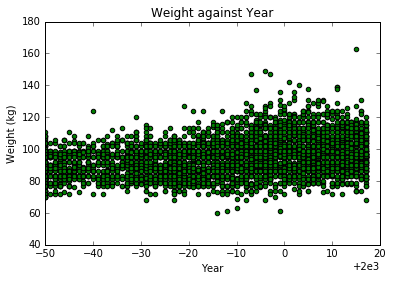

In [13]:
# Plotting weight against year to see player's weight change over the period of time
df4.plot.scatter(x='Year',y='weight',c='Green')
plt.title('Weight against Year')
plt.ylabel('Weight (kg)')
plt.xlim([1950,2020])

By lookinng at the graph, we can see that weight slightly increases as year increases over the past 70 years. This is true because players have more nutrition now as compared to the nineteen century. Players have gotten stronger and heavier.

#### 2. Height Analysis

(1950, 2020)

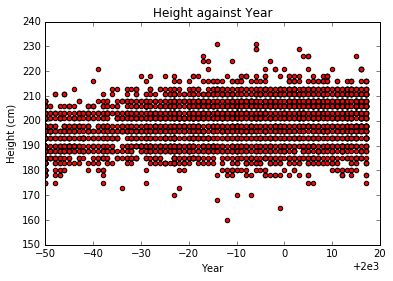

In [14]:
# Plotting height against year to see player's height change over the period of time.

df4.plot.scatter(x='Year', y='height', c='Red')
plt.title('Height against Year')
plt.ylabel('Height (cm)')
plt.xlim([1950,2020])

Again, we can see that players' height is increasing over time because the graph is slightly upward sloping. This is true again because we have more nutritious food, better training program, and food science also contributed a big factor into player's growth over time. 

## II. Analysis of background information of NBA players
Most players attend college basketball program before they enter the NBA draft hoping to fulfill their dreams. Despite a player's high school experience, college plays a vital role in determine how good a player is. Also, where they came from is important. In this case, we will explore into the datasets and determine to see if:
    1. college experience
    2. players' hometown
will affect their NBA career. 

#### 1. College Basketball Program Analysis
In general, known college basketball programs like UCLA, Duke and UNC have a great amount of players that get drafted into the NBA. The prompt here is to see whether these players have a successful career based on their performance in college.

In [15]:
# Drop all the players that didn't attend college basketball program
df4 = df4.dropna(subset=['college'])
print('Number of players that attended college: ', len(df4))

Number of players that attended college:  3573


In [16]:
df4.drop_duplicates(subset ='Player')
df4.head()

,Player,height,weight,college,born,birth_city,birth_state,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1950.0,G,31.0,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,G,29.0,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950.0,F,25.0,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,1950.0,F,24.0,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950.0,G,22.0,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0


In [17]:
# Create a new dataframe that store colleges that players attended.
college = pd.DataFrame({'college': df4['college']})

# Print out the first five college
college.head()

,college
0,Indiana University
1,University of Kentucky
2,University of Notre Dame
3,North Carolina State University
4,University of Kentucky


In [18]:
# Sort colleges in ascending order, to sort in descending set 'ascending = False'
college.sort_values(by=['college']).head(20)
college.nunique()

college    422
dtype: int64

In [19]:
# Create a dataframe with the number of frequency of colleges that will represent 
# the number of players for that college
college_totalPlayer = college.groupby(['college']).size().reset_index(name='totalPlayer')

In [20]:
college_totalPlayer.head()

,college,totalPlayer
0,Acadia University,1
1,Alabama A&M University,1
2,Alabama State University,1
3,Albany State University,4
4,Alcorn State University,4


In [21]:
college_totalPlayer.loc[college_totalPlayer['totalPlayer'].idxmax()]

college        University of Kentucky
totalPlayer                        89
Name: 311, dtype: object

There are a total of 89 players that came from University of Kentucky, which is the highest out of all colleges.

In [22]:
college_totalPlayer.loc[college_totalPlayer['totalPlayer'].idxmin()]

college        Acadia University
totalPlayer                    1
Name: 0, dtype: object

Acadia University has only 1 NBA player

In [23]:
more_than_50_players = college_totalPlayer[college_totalPlayer['totalPlayer'] >= 50]

In [75]:
# Define a function that generate random colors and append colors to a list
def random_colors(numColor):
    colorsList =[]
    for i in list(range(numColor)):
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) # Generator expression
        colorsList.append(color)
    return colorsList
random_colors(5)

# Plot a Bar chart using Plotly
plot_bar = go.Bar(x=more_than_50_players.college,
                y=more_than_50_players.totalPlayer,
                marker=dict(color= random_colors(6)),
                opacity=0.6)

title = go.Layout(title='Top colleges that produced over 50 NBA players')

fig = go.Figure(data=plot_bar, layout=title)
fig.show()

We can see that Duke, UCLA, UKen, UKan, UNC, UND has so far produced the most NBA players with more than 50 per college.

### Success in NBA???
Now we will see whether if top basketball program players have a success career in the NBA

In [25]:
# Determine quantitle for PTS
print("The top 75th percentile is: ", df4['PTS'].quantile(.75))
print("The top 50th percentile is: ", df4['PTS'].quantile(.50))

The top 75th percentile is:  486.0
The top 50th percentile is:  188.0


In [26]:
# Define a function to determine the level of efficiency of each individual player based on their points

def efficiency(df4):
    if df4['PTS'] >= 486: # top 75th percentile / elite scorer
        efficient = 'Elite'
    elif df4['PTS'] < 486 and df4['PTS'] >= 188: # top 50th percentile / good scorer
        efficient = 'Good'
    else:
        efficient = 'Ok'
    return efficient
    
# Create a new column 'Efficiecny' by calling the function defined above
df4['Efficiency'] = df4.apply(efficiency, axis = 1)
df4.head()

,Player,height,weight,college,born,birth_city,birth_state,Year,Pos,Age,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Efficiency
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1950.0,G,31.0,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,Good
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,G,29.0,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,Good
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950.0,F,25.0,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,Good
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,1950.0,F,24.0,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,Ok
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950.0,G,22.0,...,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0,Elite


In [27]:

# Create a new dataframe called data that contains college, Points, and Efficiency
data = {'Player': df4['Player'], 'college': df4['college'], 'Efficiency': df4['Efficiency']}

# Convert dict into dataframe
data = pd.DataFrame(data)
data.head()

,Player,college,Efficiency
0,Curly Armstrong,Indiana University,Good
1,Cliff Barker,University of Kentucky,Good
2,Leo Barnhorst,University of Notre Dame,Good
3,Ed Bartels,North Carolina State University,Ok
4,Ralph Beard,University of Kentucky,Elite


In [28]:
# Check for numbers of Elite and Good players

def num_elite(dataFrame):  
    result = []
    for i in data['Efficiency']:
        if i == 'Elite':
            result.append(i)
    return result

def num_good(dataFrame):  
    result = []
    for i in data['Efficiency']:
        if i == 'Good':
            result.append(i)
    return result

In [29]:
print("Number of Elite players:", len(num_elite(data)))

Number of Elite players: 894


In [30]:
print("Number of Good players:", len(num_good(data)))

Number of Good players: 896


In [31]:
print("Number of Ok players:", (3573 - 894 - 896))

Number of Ok players: 1783


In [32]:
# Alternative way of checking for rank of players
rank = data.groupby(['Efficiency']).size().reset_index(name='numPlayers')
rank

,Efficiency,numPlayers
0,Elite,894
1,Good,896
2,Ok,1783


Now that we know the number of players based on their rank. Let's find out what college produced most elite players

In [33]:
data.head(20)

,Player,college,Efficiency
0,Curly Armstrong,Indiana University,Good
1,Cliff Barker,University of Kentucky,Good
2,Leo Barnhorst,University of Notre Dame,Good
3,Ed Bartels,North Carolina State University,Ok
4,Ralph Beard,University of Kentucky,Elite
5,Gene Berce,Marquette University,Ok
6,Charlie Black,University of Kansas,Elite
7,Nelson Bobb,Temple University,Good
8,Jake Bornheimer,Muhlenberg College,Good
9,Vince Boryla,University of Denver,Elite


In [34]:
# Group by colleges and create a new column called Elite that counts the frequency college produced an elite player
mostElite = data.groupby('college')['Efficiency'].apply(lambda x: (x=='Elite').sum()).reset_index(
    name='Elite').sort_values('Elite', ascending=False)
mostElite.head(10)

,college,Elite
311,University of Kentucky,32
289,"University of California, Los Angeles",27
335,University of North Carolina,26
78,Duke University,22
126,Indiana University,20
308,University of Illinois at Urbana-Champaign,17
282,University of Arizona,15
259,Syracuse University,15
310,University of Kansas,14
250,St. John's University,14


In [35]:
# Finding out what college has the max number of Elite players
number = mostElite.iloc[mostElite['Elite'].idxmax()]['Elite']
collegeElite = mostElite.iloc[mostElite['Elite'].idxmax()]['college']
print(collegeElite, 'produced', number, 'players, most out of all colleges')

George Mason University produced 0 players, most out of all colleges


In [36]:
top10college = mostElite.head(5)

# Plot a Bar chart using Plotly
plot_bar = go.Bar(x=top10college.college,
                y=top10college.Elite,
                marker=dict(color= random_colors(5)),
                opacity=0.6)

title = go.Layout(title='Top 5 program that produced most Elite players')

fig = go.Figure(data=plot_bar, layout=title)
fig.show()

The Bar Chart above shows top 5 college basketball program that produced most Elite NBA players. This is true because most players came from Univerisity of Kentucky, UCLA, Duke, and UNC are proven to become stars.

In [37]:
sortedRanking = data.groupby(['college', 'Efficiency']).size().unstack('Efficiency').fillna(0).sort_values(
    by=['Elite','Good','Ok'], ascending=False)
# Top 10 colleges that produced most Elite, Good, and Ok NBA players
sortedRanking.head(15)

Efficiency,Elite,Good,Ok
college,,,
University of Kentucky,32.0,23.0,34.0
"University of California, Los Angeles",27.0,25.0,34.0
University of North Carolina,26.0,14.0,27.0
Duke University,22.0,11.0,23.0
Indiana University,20.0,16.0,13.0
University of Illinois at Urbana-Champaign,17.0,7.0,11.0
Syracuse University,15.0,10.0,24.0
University of Arizona,15.0,7.0,21.0
University of Kansas,14.0,14.0,31.0


#### 2. Player's hometown
Let's see where Elite players are from

In [38]:
data = pd.DataFrame({'Player': df4['Player'], 'college': df4['college'], 
                     'Efficiency': df4['Efficiency'], 'birth_state': df4['birth_state']})

In [39]:
data.head()

,Player,college,Efficiency,birth_state
0,Curly Armstrong,Indiana University,Good,NaN
1,Cliff Barker,University of Kentucky,Good,Indiana
2,Leo Barnhorst,University of Notre Dame,Good,NaN
3,Ed Bartels,North Carolina State University,Ok,NaN
4,Ralph Beard,University of Kentucky,Elite,Kentucky


In [40]:
# Drop NaN values in unknown birth state
birth_state = data.dropna()
birth_state.head()

,Player,college,Efficiency,birth_state
1,Cliff Barker,University of Kentucky,Good,Indiana
4,Ralph Beard,University of Kentucky,Elite,Kentucky
6,Charlie Black,University of Kansas,Elite,Idaho
7,Nelson Bobb,Temple University,Good,Pennsylvania
8,Jake Bornheimer,Muhlenberg College,Good,New Jersey


In [41]:
sortedBirthState = birth_state.groupby(['birth_state', 'Efficiency']).size().unstack('Efficiency').fillna(0).sort_values(
    by=['Elite','Good','Ok'], ascending=False)

In [42]:
sortedBirthState.head()

Efficiency,Elite,Good,Ok
birth_state,,,
New York,88.0,68.0,130.0
California,81.0,92.0,164.0
Illinois,55.0,51.0,97.0
Pennsylvania,54.0,28.0,80.0
Ohio,42.0,32.0,62.0


In [43]:
sortedBirthState =  pd.DataFrame(sortedBirthState)

In [44]:
sortedBirthState.head(10)

Efficiency,Elite,Good,Ok
birth_state,,,
New York,88.0,68.0,130.0
California,81.0,92.0,164.0
Illinois,55.0,51.0,97.0
Pennsylvania,54.0,28.0,80.0
Ohio,42.0,32.0,62.0
Michigan,33.0,35.0,63.0
North Carolina,32.0,19.0,45.0
Louisiana,31.0,22.0,48.0
Texas,28.0,27.0,72.0


In [45]:
# List of number of Elite players
values = sortedBirthState['Elite'].tolist()

# List of top ten states that produced most Elite players
fips = ['NY', 'CA', 'IL', 'PA', 'OH',
       'MI', 'NA', 'LA', 'TX', 'IN']

In [77]:
# Plot United States Chloropleth map
fig = go.Figure(data=go.Choropleth(
    locations=fips, # Spatial coordinates
    z=values,
    locationmode='USA-states', # set of locations match entries in `locations`
    colorscale='Reds',
    colorbar_title='# of players'))

fig.update_layout(
    title_text="Players' Birth State",
    geo_scope='usa') # limit map scope to USA
fig.show()

By looking at the U.S map, we can conclude that most players are from the East Coast. However California produced lots of basketball players

## III. Analysis of Basketball Development
Earlier, we converted players into guards and forwards. In this section, we will focus on how well guards and forwards have developed throughout the past years. To do this, we are going to focus on the key statistics:
       1. 3P: 3-Point Field Goals
       2. 3PA: 3-Point Field Goal Attempts
       3. TRB: Total Rebounds
       4. AST: Assists
       5. STL: Steals
       6. BLK: Blocks
       7. PTS: Points
       
We then will try to answer these questions:
  1. How well do forwards and guards shoot behind the 3 point line?
  2. Do these statistical data relate to each other?

In [47]:
# Create a data frame contains the above features

df = pd.DataFrame({'Year':df4['Year'],'Pos':df4['Pos'], '3P':df4['3P'], '3PA':df4['3PA'], 'TRB':df4['TRB'], 'AST':df4['AST'],
                   'STL': df4['STL'], 'BLK':df4['BLK'],'PTS':df4['PTS']})
df.head()

,Year,Pos,3P,3PA,TRB,AST,STL,BLK,PTS
0,1950.0,G,NaN,NaN,NaN,176.0,NaN,NaN,458.0
1,1950.0,G,NaN,NaN,NaN,109.0,NaN,NaN,279.0
2,1950.0,F,NaN,NaN,NaN,140.0,NaN,NaN,438.0
3,1950.0,F,NaN,NaN,NaN,20.0,NaN,NaN,63.0
4,1950.0,G,NaN,NaN,NaN,233.0,NaN,NaN,895.0


In [48]:
# Drop NaN values since the NBA did not implement 3pointer until the 80s. 
df_dropna = df.dropna()
df_dropna.tail()

,Year,Pos,3P,3PA,TRB,AST,STL,BLK,PTS
3914,2017.0,F,12.0,34.0,82.0,21.0,10.0,10.0,98.0
3915,2017.0,G,44.0,149.0,184.0,192.0,42.0,36.0,543.0
3916,2017.0,F,18.0,62.0,69.0,25.0,27.0,10.0,185.0
3917,2017.0,F,4.0,13.0,10.0,2.0,3.0,1.0,13.0
3918,2017.0,F,0.0,0.0,35.0,4.0,2.0,5.0,23.0


In [49]:
# 3 point attemp by both position, Guards and Forwards
df_3PA = pd.DataFrame(df_dropna.groupby('Pos')['3PA'].sum())
df_3PA

,3PA
Pos,
F,21913.0
G,49056.0


In [50]:
# 3 point made by Guards and Forwards
df_3P = pd.DataFrame(df_dropna.groupby('Pos')['3P'].sum())
df_3P

,3P
Pos,
F,6650.0
G,15989.0


In [51]:
df_year_3PA = pd.DataFrame((df_dropna.groupby('Year')['3PA'].sum()))
df_year_3PA.head()

,3PA
Year,
1980.0,481.0
1981.0,437.0
1982.0,499.0
1983.0,531.0
1984.0,548.0


Text(0.5, 1.0, '3PA against Year')

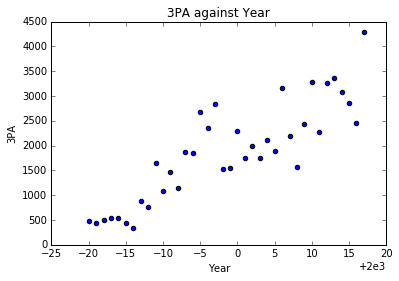

In [52]:
plt.scatter(df_year_3PA.index, df_year_3PA['3PA'])
plt.xlabel('Year')
plt.ylabel('3PA')
plt.title('3PA against Year')

#### 1. How well do forwards and guards shoot behind the 3 point line?

3-point attempts has been increasing exponentially against year. In this Era of Basketball, teams focus on their Guards as their main 3-points shooters and players shoot more in general. As compared to the 80s, teams focus more on the Centers/Forwards as the main carriers on the team. Coaches made plays there guards mostly feed their Forwards for points. 

In [53]:
df_year_3P = pd.DataFrame(df_dropna.groupby('Year')['3P'].sum())
df_year_3P.tail()

,3P
Year,
2013.0,1135.0
2014.0,977.0
2015.0,876.0
2016.0,788.0
2017.0,1386.0


In [54]:
df_3PT_percentage = pd.DataFrame({'3P':df_year_3P['3P'], '3PA':df_year_3PA['3PA'],
                                 '3PT_FG_%':(df_year_3P['3P']/df_year_3PA['3PA'])})

In [55]:
df_3PT_percentage.head()

,3P,3PA,3PT_FG_%
Year,,,
1980.0,134.0,481.0,0.278586
1981.0,76.0,437.0,0.173913
1982.0,117.0,499.0,0.234469
1983.0,121.0,531.0,0.227872
1984.0,129.0,548.0,0.235401


Text(0.5, 1.0, '3PT_FG_% against Year')

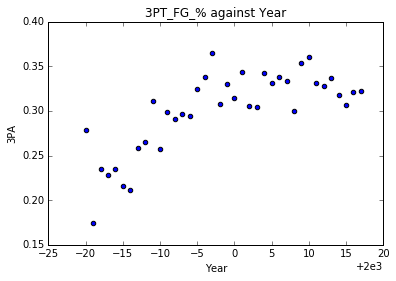

In [56]:
plt.scatter(df_3PT_percentage.index, df_3PT_percentage['3PT_FG_%'])
plt.xlabel('Year')
plt.ylabel('3PA')
plt.title('3PT_FG_% against Year')

3-point field goals percentage increases as year increases. The graphs shows two points: 
    1. 3PT_FG_% increases up until 1996 
The increase happened because players focus more on shooting the basketball, hence higher chance of scoring more points, instead of giving it to the Forwards and taking it inside the basket.
    2. 3PT_FG_% flattens out after 1996.
When the graph flattening out, it represents an example of steady state when players cannot improve their shooting percentage despite addtional hours of practice. This makes sense because players have reached their maximum potentials for shooting behind the 3-point line. Some players shoot well above 35% like Stephen Curry and Kyle Korver. However, we have to take into the account that there are players that shoot below the 35% point. 

In [57]:
df_TRB = pd.DataFrame(df_dropna.groupby('Pos')['TRB'].sum())
df_TRB

,TRB
Pos,
F,215690.0
G,82175.0


In [58]:
df_BLK = pd.DataFrame(df_dropna.groupby('Pos')['BLK'].sum())
df_BLK

,BLK
Pos,
F,30471.0
G,6561.0


In [59]:
df_PTS = pd.DataFrame(df_dropna.groupby('Pos')['PTS'].sum())
df_PTS

,PTS
Pos,
F,375632.0
G,285046.0


In [60]:
df_STL = pd.DataFrame(df_dropna.groupby('Pos')['STL'].sum())
df_STL

,STL
Pos,
F,28470.0
G,31026.0


In [61]:
df_AST = pd.DataFrame(df_dropna.groupby('Pos')['AST'].sum())
df_AST

,AST
Pos,
F,51230.0
G,97952.0


In [62]:
# Creata a data frame that contains blk, trb, pts, stl, and ast for Forwards and Guards using above dfs
df_F_G = pd.DataFrame({'BLK':df_BLK['BLK'], 'TRB':df_TRB['TRB'],'PTS':df_PTS['PTS'],
                           'STL':df_STL['STL'], 'AST':df_AST['AST']})
df_F_G

,BLK,TRB,PTS,STL,AST
Pos,,,,,
F,30471.0,215690.0,375632.0,28470.0,51230.0
G,6561.0,82175.0,285046.0,31026.0,97952.0


In [63]:
# Create bar chart to compare the difference between F and G performances
fig = go.Figure(data=[
    go.Bar(name='F',x=df_F_G.columns,y=df_F_G.iloc[0]),
    go.Bar(name='G',x=df_F_G.columns,y=df_F_G.iloc[1])
])
fig.update_layout(title_text='Forwards vs Guards in BLK, TRB, PTS, STL, and AST')
fig.show()

#### 2. Do these statistical data relate to each other?

Stats above show that Forwards are far more superior in Blocking and Rebounding as compared to Guards. However, they are not that far apart in Scoring. But still, Forwards are a powerhouse in Basketball, they are known as elite scorers while Guards are known for their fast pace and better at stealing and assisting their team

## Predicting MVPs

In [64]:
import seaborn as sns
import os


In [65]:
player_data = pd.read_csv('/Users/phongleh/Desktop/Data Science/NBA Player Analysis Project/player_data.csv', 
                      index_col=0, parse_dates=True)

In [66]:
player_data.head()

,year_start,year_end,position,height,weight,birth_date,college
name,,,,,,,
Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [67]:
len(player_data), len(Seasons_Stats), len(Players)
Seasons_Stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [68]:
seasons_stats = Seasons_Stats[~Seasons_Stats.Player.isnull()]
players = Players[~Players.Player.isnull()]
players.head()

,Player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [69]:
players = players.rename(columns = {'Unnamed: 0':'id'})

In [70]:
players.head() 

,Player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [71]:
num_players = player_data.groupby('name').count()
num_players =  num_players.iloc[:,:1]
num_players = num_players.reset_index()
num_players.columns = ['Player', 'count']
num_players[num_players['count'] > 1].head()

,Player,count
314,Bill Bradley,2
420,Bob Duffy,2
494,Bobby Jones,2
505,Bobby Wilson,2
680,Cedric Henderson,2
